# Trabajo Práctico 3 - Regularización aplicada a la EPH 

## Gil Deza, Hüppi Lo Prete, Walker 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

In [1]:
# Utilizamos el código de la clase tutorial para crear un botón para ocultar el código 
#Fuente: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

### Parte I

#### 1) 

Las variables que pueden servir como predictores para entender si un hogar es pobre o no son:
        -Variables que representan las características de la vivienda como el acceso al agua, a un baño, materiales de construcción y si está dentro de un barrio de emergencia. 
        -Variables que representan las características habitacionales del hogar como por ejemplo, la cantidad de cuartos destinados para dormir, régimen de tenecia del terreno y qué combustible se utiliza para cocinar. 
        -Variables denominada "Estrategias del hogar", entre ellas se encuentran si cobran un subsidio, si tienen una beca de estudio, si tuvieron que vender sus pertenencias en el último tiempo,  menores de edad trabajando, cantidad de personas que viven en el hogar, decil de ingresos, entre otras. Consideramos que esta última variable es muy relevante dado que marca la diferencia entre medir la pobreza a nivel hogar o a nivel individuo debido a que hogares pobres tienden a tener más miembros.

#### 2)

In [4]:
# Abrimos la base de hogar 
df=pd.read_excel("usu_hogar_T122.xls")
df
# Abrimos la tabla de usuarios 
df_usu=pd.read_excel("usu_individual_T122.xls")

In [5]:
# Armamos un nuevo df solo con las observaciones de Buenos Aires y Gran Buenos Aires
df_ba = df.loc[df['AGLOMERADO'].isin([32, 33])]
df_ba


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
11,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,S,33,4625,2,...,0.0,NaN,0,4410,1,0,98,0,0,0
23,TQRMNOPSSHKKMMCDEIIAD00780111,2022,1,1,1,1,S,32,803,1,...,10.0,NaN,8,1440,1,2,98,0,0,0
52,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,10.0,NaN,9,4073,2,0,98,0,0,0
61,TQRMNORUPHMLRMCDEIJAH00698717,2022,1,1,1,1,S,33,1698,1,...,12.0,NaN,12,0,2,1,3,0,0,0
72,TQRMNOTUYHMMKNCDEIJAH00698671,2022,1,1,1,1,S,33,3764,1,...,12.0,NaN,12,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,TQRMNOPXQHJOKPCDEIJAH00718715,2022,1,1,1,1,S,33,3278,1,...,1.0,NaN,1,5814,2,0,3,4,0,0
16779,TQRMNOPXRHJOKPCDEIJAH00718716,2022,1,1,1,1,S,33,3976,1,...,3.0,NaN,4,6427,2,1,3,4,0,0
16780,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,S,33,2607,1,...,3.0,NaN,4,5084,1,2,98,0,0,0
16781,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,S,33,2325,1,...,5.0,NaN,6,4528,1,2,98,0,0,0


#### 3)

In [6]:
df_ba_unido = pd.merge(df_ba, df_usu, on=("CODUSU","NRO_HOGAR"), how="inner", validate="one_to_many")
df_ba_unido
print(list(df_ba_unido.columns))

['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV1_ESP', 'IV2', 'IV3', 'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF_x', 'DECIFR_x', 'IDECIFR_x', 'RDECIFR_x', 'GDECIFR_x', 'PDECIFR_x', 'ADECIFR_x', 'IPCF_x', 'DECCFR_x', 'IDECCFR_x', 'RDECCFR_x', 'GDECCFR_x', 'PDECCFR_x', 'ADECCFR_x', 'PONDIH_x', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'ANO4_y', 'TRIMESTRE_y', 'COMPONENTE', 'H15', 'REGION_y', 'MAS_500_y', 'AGLOMERADO_y', 'PONDERA_y', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 

Eliminamos todas las columnas duplicadas luego del merge, dado que se encontraban en ambas bases.

In [7]:
# Observamos cuáles son las columnas que están repetidas, antes de eliminarlas:
df_variables_dup = df_ba_unido.filter(regex='_y')
df_variables_dup

# Las eliminamos
df_ba_unido.drop(columns=(df_ba_unido.filter(regex='_y')), inplace=True)

print(list(df_ba_unido.columns))

['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV1_ESP', 'IV2', 'IV3', 'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF_x', 'DECIFR_x', 'IDECIFR_x', 'RDECIFR_x', 'GDECIFR_x', 'PDECIFR_x', 'ADECIFR_x', 'IPCF_x', 'DECCFR_x', 'IDECCFR_x', 'RDECCFR_x', 'GDECCFR_x', 'PDECCFR_x', 'ADECCFR_x', 'PONDIH_x', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', '

#### 4)

Utilizamos la función dropna del paquete de Pandas para eliminar columnas con observaciones vacias

#### 5)

In [8]:
# Limpiamos la base de los datos nulos
# Eliminamos columnas que tienen más del 50% de observaciones vacías 
df_ba_unido_limpio = df_ba_unido.dropna(axis=1, thresh=3372)
#df_ba_unido_limpio.to_excel("base2.xlsx", sheet_name="sheet1", index=False)

In [9]:
# Chequeamos que ya no quedan missings values
for i in range(len(df_ba_unido_limpio.index)) : 
    print("Número de missing values en la fila", i + 1, ":",
         df_ba_unido_limpio.iloc[i].isnull().sum())

Número de missing values en la fila 1 : 0
Número de missing values en la fila 2 : 0
Número de missing values en la fila 3 : 0
Número de missing values en la fila 4 : 0
Número de missing values en la fila 5 : 0
Número de missing values en la fila 6 : 0
Número de missing values en la fila 7 : 0
Número de missing values en la fila 8 : 0
Número de missing values en la fila 9 : 0
Número de missing values en la fila 10 : 0
Número de missing values en la fila 11 : 0
Número de missing values en la fila 12 : 0
Número de missing values en la fila 13 : 0
Número de missing values en la fila 14 : 0
Número de missing values en la fila 15 : 0
Número de missing values en la fila 16 : 0
Número de missing values en la fila 17 : 0
Número de missing values en la fila 18 : 0
Número de missing values en la fila 19 : 0
Número de missing values en la fila 20 : 0
Número de missing values en la fila 21 : 0
Número de missing values en la fila 22 : 0
Número de missing values en la fila 23 : 0
Número de missing va

Número de missing values en la fila 259 : 0
Número de missing values en la fila 260 : 0
Número de missing values en la fila 261 : 0
Número de missing values en la fila 262 : 0
Número de missing values en la fila 263 : 0
Número de missing values en la fila 264 : 0
Número de missing values en la fila 265 : 0
Número de missing values en la fila 266 : 0
Número de missing values en la fila 267 : 0
Número de missing values en la fila 268 : 0
Número de missing values en la fila 269 : 0
Número de missing values en la fila 270 : 0
Número de missing values en la fila 271 : 0
Número de missing values en la fila 272 : 0
Número de missing values en la fila 273 : 0
Número de missing values en la fila 274 : 0
Número de missing values en la fila 275 : 0
Número de missing values en la fila 276 : 0
Número de missing values en la fila 277 : 0
Número de missing values en la fila 278 : 0
Número de missing values en la fila 279 : 0
Número de missing values en la fila 280 : 0
Número de missing values en la f

Número de missing values en la fila 495 : 0
Número de missing values en la fila 496 : 0
Número de missing values en la fila 497 : 0
Número de missing values en la fila 498 : 0
Número de missing values en la fila 499 : 0
Número de missing values en la fila 500 : 0
Número de missing values en la fila 501 : 0
Número de missing values en la fila 502 : 0
Número de missing values en la fila 503 : 0
Número de missing values en la fila 504 : 0
Número de missing values en la fila 505 : 0
Número de missing values en la fila 506 : 0
Número de missing values en la fila 507 : 0
Número de missing values en la fila 508 : 0
Número de missing values en la fila 509 : 0
Número de missing values en la fila 510 : 0
Número de missing values en la fila 511 : 0
Número de missing values en la fila 512 : 0
Número de missing values en la fila 513 : 0
Número de missing values en la fila 514 : 0
Número de missing values en la fila 515 : 0
Número de missing values en la fila 516 : 0
Número de missing values en la f

Número de missing values en la fila 762 : 0
Número de missing values en la fila 763 : 0
Número de missing values en la fila 764 : 0
Número de missing values en la fila 765 : 0
Número de missing values en la fila 766 : 0
Número de missing values en la fila 767 : 0
Número de missing values en la fila 768 : 0
Número de missing values en la fila 769 : 0
Número de missing values en la fila 770 : 0
Número de missing values en la fila 771 : 0
Número de missing values en la fila 772 : 0
Número de missing values en la fila 773 : 0
Número de missing values en la fila 774 : 0
Número de missing values en la fila 775 : 0
Número de missing values en la fila 776 : 0
Número de missing values en la fila 777 : 0
Número de missing values en la fila 778 : 0
Número de missing values en la fila 779 : 0
Número de missing values en la fila 780 : 0
Número de missing values en la fila 781 : 0
Número de missing values en la fila 782 : 0
Número de missing values en la fila 783 : 0
Número de missing values en la f

Número de missing values en la fila 1028 : 0
Número de missing values en la fila 1029 : 0
Número de missing values en la fila 1030 : 0
Número de missing values en la fila 1031 : 0
Número de missing values en la fila 1032 : 0
Número de missing values en la fila 1033 : 0
Número de missing values en la fila 1034 : 0
Número de missing values en la fila 1035 : 0
Número de missing values en la fila 1036 : 0
Número de missing values en la fila 1037 : 0
Número de missing values en la fila 1038 : 0
Número de missing values en la fila 1039 : 0
Número de missing values en la fila 1040 : 0
Número de missing values en la fila 1041 : 0
Número de missing values en la fila 1042 : 0
Número de missing values en la fila 1043 : 0
Número de missing values en la fila 1044 : 0
Número de missing values en la fila 1045 : 0
Número de missing values en la fila 1046 : 0
Número de missing values en la fila 1047 : 0
Número de missing values en la fila 1048 : 0
Número de missing values en la fila 1049 : 0
Número de 

Número de missing values en la fila 1269 : 0
Número de missing values en la fila 1270 : 0
Número de missing values en la fila 1271 : 0
Número de missing values en la fila 1272 : 0
Número de missing values en la fila 1273 : 0
Número de missing values en la fila 1274 : 0
Número de missing values en la fila 1275 : 0
Número de missing values en la fila 1276 : 0
Número de missing values en la fila 1277 : 0
Número de missing values en la fila 1278 : 0
Número de missing values en la fila 1279 : 0
Número de missing values en la fila 1280 : 0
Número de missing values en la fila 1281 : 0
Número de missing values en la fila 1282 : 0
Número de missing values en la fila 1283 : 0
Número de missing values en la fila 1284 : 0
Número de missing values en la fila 1285 : 0
Número de missing values en la fila 1286 : 0
Número de missing values en la fila 1287 : 0
Número de missing values en la fila 1288 : 0
Número de missing values en la fila 1289 : 0
Número de missing values en la fila 1290 : 0
Número de 

Número de missing values en la fila 1533 : 0
Número de missing values en la fila 1534 : 0
Número de missing values en la fila 1535 : 0
Número de missing values en la fila 1536 : 0
Número de missing values en la fila 1537 : 0
Número de missing values en la fila 1538 : 0
Número de missing values en la fila 1539 : 0
Número de missing values en la fila 1540 : 0
Número de missing values en la fila 1541 : 0
Número de missing values en la fila 1542 : 0
Número de missing values en la fila 1543 : 0
Número de missing values en la fila 1544 : 0
Número de missing values en la fila 1545 : 0
Número de missing values en la fila 1546 : 0
Número de missing values en la fila 1547 : 0
Número de missing values en la fila 1548 : 0
Número de missing values en la fila 1549 : 0
Número de missing values en la fila 1550 : 0
Número de missing values en la fila 1551 : 0
Número de missing values en la fila 1552 : 0
Número de missing values en la fila 1553 : 0
Número de missing values en la fila 1554 : 0
Número de 

Número de missing values en la fila 1802 : 0
Número de missing values en la fila 1803 : 0
Número de missing values en la fila 1804 : 0
Número de missing values en la fila 1805 : 0
Número de missing values en la fila 1806 : 0
Número de missing values en la fila 1807 : 0
Número de missing values en la fila 1808 : 0
Número de missing values en la fila 1809 : 0
Número de missing values en la fila 1810 : 0
Número de missing values en la fila 1811 : 0
Número de missing values en la fila 1812 : 0
Número de missing values en la fila 1813 : 0
Número de missing values en la fila 1814 : 0
Número de missing values en la fila 1815 : 0
Número de missing values en la fila 1816 : 0
Número de missing values en la fila 1817 : 0
Número de missing values en la fila 1818 : 0
Número de missing values en la fila 1819 : 0
Número de missing values en la fila 1820 : 0
Número de missing values en la fila 1821 : 0
Número de missing values en la fila 1822 : 0
Número de missing values en la fila 1823 : 0
Número de 

Número de missing values en la fila 2059 : 0
Número de missing values en la fila 2060 : 0
Número de missing values en la fila 2061 : 0
Número de missing values en la fila 2062 : 0
Número de missing values en la fila 2063 : 0
Número de missing values en la fila 2064 : 0
Número de missing values en la fila 2065 : 0
Número de missing values en la fila 2066 : 0
Número de missing values en la fila 2067 : 0
Número de missing values en la fila 2068 : 0
Número de missing values en la fila 2069 : 0
Número de missing values en la fila 2070 : 0
Número de missing values en la fila 2071 : 0
Número de missing values en la fila 2072 : 0
Número de missing values en la fila 2073 : 0
Número de missing values en la fila 2074 : 0
Número de missing values en la fila 2075 : 0
Número de missing values en la fila 2076 : 0
Número de missing values en la fila 2077 : 0
Número de missing values en la fila 2078 : 0
Número de missing values en la fila 2079 : 0
Número de missing values en la fila 2080 : 0
Número de 

Número de missing values en la fila 2291 : 0
Número de missing values en la fila 2292 : 0
Número de missing values en la fila 2293 : 0
Número de missing values en la fila 2294 : 0
Número de missing values en la fila 2295 : 0
Número de missing values en la fila 2296 : 0
Número de missing values en la fila 2297 : 0
Número de missing values en la fila 2298 : 0
Número de missing values en la fila 2299 : 0
Número de missing values en la fila 2300 : 0
Número de missing values en la fila 2301 : 0
Número de missing values en la fila 2302 : 0
Número de missing values en la fila 2303 : 0
Número de missing values en la fila 2304 : 0
Número de missing values en la fila 2305 : 0
Número de missing values en la fila 2306 : 0
Número de missing values en la fila 2307 : 0
Número de missing values en la fila 2308 : 0
Número de missing values en la fila 2309 : 0
Número de missing values en la fila 2310 : 0
Número de missing values en la fila 2311 : 0
Número de missing values en la fila 2312 : 0
Número de 

Número de missing values en la fila 2556 : 0
Número de missing values en la fila 2557 : 0
Número de missing values en la fila 2558 : 0
Número de missing values en la fila 2559 : 0
Número de missing values en la fila 2560 : 0
Número de missing values en la fila 2561 : 0
Número de missing values en la fila 2562 : 0
Número de missing values en la fila 2563 : 0
Número de missing values en la fila 2564 : 0
Número de missing values en la fila 2565 : 0
Número de missing values en la fila 2566 : 0
Número de missing values en la fila 2567 : 0
Número de missing values en la fila 2568 : 0
Número de missing values en la fila 2569 : 0
Número de missing values en la fila 2570 : 0
Número de missing values en la fila 2571 : 0
Número de missing values en la fila 2572 : 0
Número de missing values en la fila 2573 : 0
Número de missing values en la fila 2574 : 0
Número de missing values en la fila 2575 : 0
Número de missing values en la fila 2576 : 0
Número de missing values en la fila 2577 : 0
Número de 

Número de missing values en la fila 2834 : 0
Número de missing values en la fila 2835 : 0
Número de missing values en la fila 2836 : 0
Número de missing values en la fila 2837 : 0
Número de missing values en la fila 2838 : 0
Número de missing values en la fila 2839 : 0
Número de missing values en la fila 2840 : 0
Número de missing values en la fila 2841 : 0
Número de missing values en la fila 2842 : 0
Número de missing values en la fila 2843 : 0
Número de missing values en la fila 2844 : 0
Número de missing values en la fila 2845 : 0
Número de missing values en la fila 2846 : 0
Número de missing values en la fila 2847 : 0
Número de missing values en la fila 2848 : 0
Número de missing values en la fila 2849 : 0
Número de missing values en la fila 2850 : 0
Número de missing values en la fila 2851 : 0
Número de missing values en la fila 2852 : 0
Número de missing values en la fila 2853 : 0
Número de missing values en la fila 2854 : 0
Número de missing values en la fila 2855 : 0
Número de 

Número de missing values en la fila 3093 : 0
Número de missing values en la fila 3094 : 0
Número de missing values en la fila 3095 : 0
Número de missing values en la fila 3096 : 0
Número de missing values en la fila 3097 : 0
Número de missing values en la fila 3098 : 0
Número de missing values en la fila 3099 : 0
Número de missing values en la fila 3100 : 0
Número de missing values en la fila 3101 : 0
Número de missing values en la fila 3102 : 0
Número de missing values en la fila 3103 : 0
Número de missing values en la fila 3104 : 0
Número de missing values en la fila 3105 : 0
Número de missing values en la fila 3106 : 0
Número de missing values en la fila 3107 : 0
Número de missing values en la fila 3108 : 0
Número de missing values en la fila 3109 : 0
Número de missing values en la fila 3110 : 0
Número de missing values en la fila 3111 : 0
Número de missing values en la fila 3112 : 0
Número de missing values en la fila 3113 : 0
Número de missing values en la fila 3114 : 0
Número de 

Número de missing values en la fila 3336 : 0
Número de missing values en la fila 3337 : 0
Número de missing values en la fila 3338 : 0
Número de missing values en la fila 3339 : 0
Número de missing values en la fila 3340 : 0
Número de missing values en la fila 3341 : 0
Número de missing values en la fila 3342 : 0
Número de missing values en la fila 3343 : 0
Número de missing values en la fila 3344 : 0
Número de missing values en la fila 3345 : 0
Número de missing values en la fila 3346 : 0
Número de missing values en la fila 3347 : 0
Número de missing values en la fila 3348 : 0
Número de missing values en la fila 3349 : 0
Número de missing values en la fila 3350 : 0
Número de missing values en la fila 3351 : 0
Número de missing values en la fila 3352 : 0
Número de missing values en la fila 3353 : 0
Número de missing values en la fila 3354 : 0
Número de missing values en la fila 3355 : 0
Número de missing values en la fila 3356 : 0
Número de missing values en la fila 3357 : 0
Número de 

Número de missing values en la fila 3600 : 0
Número de missing values en la fila 3601 : 0
Número de missing values en la fila 3602 : 0
Número de missing values en la fila 3603 : 0
Número de missing values en la fila 3604 : 0
Número de missing values en la fila 3605 : 0
Número de missing values en la fila 3606 : 0
Número de missing values en la fila 3607 : 0
Número de missing values en la fila 3608 : 0
Número de missing values en la fila 3609 : 0
Número de missing values en la fila 3610 : 0
Número de missing values en la fila 3611 : 0
Número de missing values en la fila 3612 : 0
Número de missing values en la fila 3613 : 0
Número de missing values en la fila 3614 : 0
Número de missing values en la fila 3615 : 0
Número de missing values en la fila 3616 : 0
Número de missing values en la fila 3617 : 0
Número de missing values en la fila 3618 : 0
Número de missing values en la fila 3619 : 0
Número de missing values en la fila 3620 : 0
Número de missing values en la fila 3621 : 0
Número de 

Número de missing values en la fila 3853 : 0
Número de missing values en la fila 3854 : 0
Número de missing values en la fila 3855 : 0
Número de missing values en la fila 3856 : 0
Número de missing values en la fila 3857 : 0
Número de missing values en la fila 3858 : 0
Número de missing values en la fila 3859 : 0
Número de missing values en la fila 3860 : 0
Número de missing values en la fila 3861 : 0
Número de missing values en la fila 3862 : 0
Número de missing values en la fila 3863 : 0
Número de missing values en la fila 3864 : 0
Número de missing values en la fila 3865 : 0
Número de missing values en la fila 3866 : 0
Número de missing values en la fila 3867 : 0
Número de missing values en la fila 3868 : 0
Número de missing values en la fila 3869 : 0
Número de missing values en la fila 3870 : 0
Número de missing values en la fila 3871 : 0
Número de missing values en la fila 3872 : 0
Número de missing values en la fila 3873 : 0
Número de missing values en la fila 3874 : 0
Número de 

Número de missing values en la fila 4110 : 0
Número de missing values en la fila 4111 : 0
Número de missing values en la fila 4112 : 0
Número de missing values en la fila 4113 : 0
Número de missing values en la fila 4114 : 0
Número de missing values en la fila 4115 : 0
Número de missing values en la fila 4116 : 0
Número de missing values en la fila 4117 : 0
Número de missing values en la fila 4118 : 0
Número de missing values en la fila 4119 : 0
Número de missing values en la fila 4120 : 0
Número de missing values en la fila 4121 : 0
Número de missing values en la fila 4122 : 0
Número de missing values en la fila 4123 : 0
Número de missing values en la fila 4124 : 0
Número de missing values en la fila 4125 : 0
Número de missing values en la fila 4126 : 0
Número de missing values en la fila 4127 : 0
Número de missing values en la fila 4128 : 0
Número de missing values en la fila 4129 : 0
Número de missing values en la fila 4130 : 0
Número de missing values en la fila 4131 : 0
Número de 

Número de missing values en la fila 4365 : 0
Número de missing values en la fila 4366 : 0
Número de missing values en la fila 4367 : 0
Número de missing values en la fila 4368 : 0
Número de missing values en la fila 4369 : 0
Número de missing values en la fila 4370 : 0
Número de missing values en la fila 4371 : 0
Número de missing values en la fila 4372 : 0
Número de missing values en la fila 4373 : 0
Número de missing values en la fila 4374 : 0
Número de missing values en la fila 4375 : 0
Número de missing values en la fila 4376 : 0
Número de missing values en la fila 4377 : 0
Número de missing values en la fila 4378 : 0
Número de missing values en la fila 4379 : 0
Número de missing values en la fila 4380 : 0
Número de missing values en la fila 4381 : 0
Número de missing values en la fila 4382 : 0
Número de missing values en la fila 4383 : 0
Número de missing values en la fila 4384 : 0
Número de missing values en la fila 4385 : 0
Número de missing values en la fila 4386 : 0
Número de 

Número de missing values en la fila 4629 : 0
Número de missing values en la fila 4630 : 0
Número de missing values en la fila 4631 : 0
Número de missing values en la fila 4632 : 0
Número de missing values en la fila 4633 : 0
Número de missing values en la fila 4634 : 0
Número de missing values en la fila 4635 : 0
Número de missing values en la fila 4636 : 0
Número de missing values en la fila 4637 : 0
Número de missing values en la fila 4638 : 0
Número de missing values en la fila 4639 : 0
Número de missing values en la fila 4640 : 0
Número de missing values en la fila 4641 : 0
Número de missing values en la fila 4642 : 0
Número de missing values en la fila 4643 : 0
Número de missing values en la fila 4644 : 0
Número de missing values en la fila 4645 : 0
Número de missing values en la fila 4646 : 0
Número de missing values en la fila 4647 : 0
Número de missing values en la fila 4648 : 0
Número de missing values en la fila 4649 : 0
Número de missing values en la fila 4650 : 0
Número de 

Número de missing values en la fila 4897 : 0
Número de missing values en la fila 4898 : 0
Número de missing values en la fila 4899 : 0
Número de missing values en la fila 4900 : 0
Número de missing values en la fila 4901 : 0
Número de missing values en la fila 4902 : 0
Número de missing values en la fila 4903 : 0
Número de missing values en la fila 4904 : 0
Número de missing values en la fila 4905 : 0
Número de missing values en la fila 4906 : 0
Número de missing values en la fila 4907 : 0
Número de missing values en la fila 4908 : 0
Número de missing values en la fila 4909 : 0
Número de missing values en la fila 4910 : 0
Número de missing values en la fila 4911 : 0
Número de missing values en la fila 4912 : 0
Número de missing values en la fila 4913 : 0
Número de missing values en la fila 4914 : 0
Número de missing values en la fila 4915 : 0
Número de missing values en la fila 4916 : 0
Número de missing values en la fila 4917 : 0
Número de missing values en la fila 4918 : 0
Número de 

Número de missing values en la fila 5176 : 0
Número de missing values en la fila 5177 : 0
Número de missing values en la fila 5178 : 0
Número de missing values en la fila 5179 : 0
Número de missing values en la fila 5180 : 0
Número de missing values en la fila 5181 : 0
Número de missing values en la fila 5182 : 0
Número de missing values en la fila 5183 : 0
Número de missing values en la fila 5184 : 0
Número de missing values en la fila 5185 : 0
Número de missing values en la fila 5186 : 0
Número de missing values en la fila 5187 : 0
Número de missing values en la fila 5188 : 0
Número de missing values en la fila 5189 : 0
Número de missing values en la fila 5190 : 0
Número de missing values en la fila 5191 : 0
Número de missing values en la fila 5192 : 0
Número de missing values en la fila 5193 : 0
Número de missing values en la fila 5194 : 0
Número de missing values en la fila 5195 : 0
Número de missing values en la fila 5196 : 0
Número de missing values en la fila 5197 : 0
Número de 

Número de missing values en la fila 5434 : 0
Número de missing values en la fila 5435 : 0
Número de missing values en la fila 5436 : 0
Número de missing values en la fila 5437 : 0
Número de missing values en la fila 5438 : 0
Número de missing values en la fila 5439 : 0
Número de missing values en la fila 5440 : 0
Número de missing values en la fila 5441 : 0
Número de missing values en la fila 5442 : 0
Número de missing values en la fila 5443 : 0
Número de missing values en la fila 5444 : 0
Número de missing values en la fila 5445 : 0
Número de missing values en la fila 5446 : 0
Número de missing values en la fila 5447 : 0
Número de missing values en la fila 5448 : 0
Número de missing values en la fila 5449 : 0
Número de missing values en la fila 5450 : 0
Número de missing values en la fila 5451 : 0
Número de missing values en la fila 5452 : 0
Número de missing values en la fila 5453 : 0
Número de missing values en la fila 5454 : 0
Número de missing values en la fila 5455 : 0
Número de 

Número de missing values en la fila 5722 : 0
Número de missing values en la fila 5723 : 0
Número de missing values en la fila 5724 : 0
Número de missing values en la fila 5725 : 0
Número de missing values en la fila 5726 : 0
Número de missing values en la fila 5727 : 0
Número de missing values en la fila 5728 : 0
Número de missing values en la fila 5729 : 0
Número de missing values en la fila 5730 : 0
Número de missing values en la fila 5731 : 0
Número de missing values en la fila 5732 : 0
Número de missing values en la fila 5733 : 0
Número de missing values en la fila 5734 : 0
Número de missing values en la fila 5735 : 0
Número de missing values en la fila 5736 : 0
Número de missing values en la fila 5737 : 0
Número de missing values en la fila 5738 : 0
Número de missing values en la fila 5739 : 0
Número de missing values en la fila 5740 : 0
Número de missing values en la fila 5741 : 0
Número de missing values en la fila 5742 : 0
Número de missing values en la fila 5743 : 0
Número de 

Número de missing values en la fila 5989 : 0
Número de missing values en la fila 5990 : 0
Número de missing values en la fila 5991 : 0
Número de missing values en la fila 5992 : 0
Número de missing values en la fila 5993 : 0
Número de missing values en la fila 5994 : 0
Número de missing values en la fila 5995 : 0
Número de missing values en la fila 5996 : 0
Número de missing values en la fila 5997 : 0
Número de missing values en la fila 5998 : 0
Número de missing values en la fila 5999 : 0
Número de missing values en la fila 6000 : 0
Número de missing values en la fila 6001 : 0
Número de missing values en la fila 6002 : 0
Número de missing values en la fila 6003 : 0
Número de missing values en la fila 6004 : 0
Número de missing values en la fila 6005 : 0
Número de missing values en la fila 6006 : 0
Número de missing values en la fila 6007 : 0
Número de missing values en la fila 6008 : 0
Número de missing values en la fila 6009 : 0
Número de missing values en la fila 6010 : 0
Número de 

Número de missing values en la fila 6244 : 0
Número de missing values en la fila 6245 : 0
Número de missing values en la fila 6246 : 0
Número de missing values en la fila 6247 : 0
Número de missing values en la fila 6248 : 0
Número de missing values en la fila 6249 : 0
Número de missing values en la fila 6250 : 0
Número de missing values en la fila 6251 : 0
Número de missing values en la fila 6252 : 0
Número de missing values en la fila 6253 : 0
Número de missing values en la fila 6254 : 0
Número de missing values en la fila 6255 : 0
Número de missing values en la fila 6256 : 0
Número de missing values en la fila 6257 : 0
Número de missing values en la fila 6258 : 0
Número de missing values en la fila 6259 : 0
Número de missing values en la fila 6260 : 0
Número de missing values en la fila 6261 : 0
Número de missing values en la fila 6262 : 0
Número de missing values en la fila 6263 : 0
Número de missing values en la fila 6264 : 0
Número de missing values en la fila 6265 : 0
Número de 

Número de missing values en la fila 6514 : 0
Número de missing values en la fila 6515 : 0
Número de missing values en la fila 6516 : 0
Número de missing values en la fila 6517 : 0
Número de missing values en la fila 6518 : 0
Número de missing values en la fila 6519 : 0
Número de missing values en la fila 6520 : 0
Número de missing values en la fila 6521 : 0
Número de missing values en la fila 6522 : 0
Número de missing values en la fila 6523 : 0
Número de missing values en la fila 6524 : 0
Número de missing values en la fila 6525 : 0
Número de missing values en la fila 6526 : 0
Número de missing values en la fila 6527 : 0
Número de missing values en la fila 6528 : 0
Número de missing values en la fila 6529 : 0
Número de missing values en la fila 6530 : 0
Número de missing values en la fila 6531 : 0
Número de missing values en la fila 6532 : 0
Número de missing values en la fila 6533 : 0
Número de missing values en la fila 6534 : 0
Número de missing values en la fila 6535 : 0
Número de 

In [10]:
# Eliminamos outliers 
for column in df_ba_unido_limpio.columns[1:]:
    #print(df_ba_unido_limpio[column])
    #print(df_ba_unido_limpio[column].dtype)
    if df_ba_unido_limpio[column].dtype== "str":
        continue
    elif df_ba_unido_limpio[column].dtype== "object":
        continue
    else:
        #print(df_ba_unido_limpio[column].dtype)
        q_low = df_ba_unido_limpio[column].quantile(q = 0.01)
        q_hi = df_ba_unido_limpio[column].quantile(q = 0.99)
        f_filtrada = df_ba_unido_limpio[(df_ba_unido_limpio[column]<q_hi) & (df_ba_unido_limpio[column]>q_low)]
f_filtrada

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,...,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI
0,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,S,33,4625,2,...,0,0,0,0,0,0,0,0,0,0
2,TQRMNOPSSHKKMMCDEIIAD00780111,2022,1,1,1,1,S,32,803,1,...,0,0,0,0,0,0,0,0,24000,80000
3,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,0,0,0,0,0,0,0,0,0,0
4,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,0,0,0,0,0,0,0,0,0,0
5,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,S,33,2607,1,...,0,0,0,0,0,0,0,0,0,0
6702,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,S,33,2325,1,...,0,0,0,0,0,0,0,0,0,28000
6703,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,S,33,2325,1,...,0,0,0,0,0,0,0,0,0,0
6704,TQRMNORUVHLLKQCDEIJAH00718720,2022,1,1,1,1,S,33,2102,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
for column in f_filtrada.columns[1:]:
    if f_filtrada[column].dtype == "int64":
        continue
    elif f_filtrada[column].dtype == "float64":
        continue
    else:
        print(column, "es una variable", f_filtrada[column].dtype)

MAS_500_x es una variable object
CH05 es una variable object


Chequeamos cuál es el contenido de las variables que nos generarían problemas al no ser numéricas

In [12]:
print(list(f_filtrada.CH05))
print(list(f_filtrada.MAS_500_x))

[datetime.datetime(1964, 12, 2, 0, 0), datetime.datetime(1947, 8, 14, 0, 0), datetime.datetime(1973, 2, 21, 0, 0), datetime.datetime(1975, 7, 9, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1964, 9, 10, 0, 0), datetime.datetime(1986, 6, 24, 0, 0), datetime.datetime(1994, 11, 8, 0, 0), datetime.datetime(1971, 4, 19, 0, 0), datetime.datetime(1962, 4, 24, 0, 0), datetime.datetime(2008, 11, 2, 0, 0), datetime.datetime(2009, 10, 12, 0, 0), datetime.datetime(2010, 3, 15, 0, 0), datetime.datetime(1981, 3, 25, 0, 0), datetime.datetime(1982, 12, 18, 0, 0), datetime.datetime(2013, 12, 7, 0, 0), datetime.datetime(2019, 11, 7, 0, 0), datetime.datetime(1973, 9, 6, 0, 0), datetime.datetime(1956, 10, 18, 0, 0), datetime.datetime(1943, 1, 6, 0, 0), datetime.datetime(1984, 1, 9, 0, 0), datetime.datetime(1989, 9, 6, 0, 0), datetime.datetime(2014, 12, 8, 0, 0), datetime.datetime(2011, 3, 28, 0, 0), datetime.datetime(1994, 6, 16, 0, 0), datetime.datetime(1984, 11, 2, 0, 0), datetime.datet


Observamos que CH05 contiene la fecha de nacimiento de los individuos (con lo cual podríamos borrarla, dado que tenemos su edad en la base también)

MAS_500_x contienen una letra que indica el tamaño del aglomerado. Al habernos quedado con las observaciones de BsAs y Gran BsAs, todas tienen una "S".

Debido a esto, consideramos que podemos deshacernos de tales variables sin mayores problemas.

In [13]:
f_filtrada.drop(columns="CH05", inplace=True)
f_filtrada.drop(columns="MAS_500_x", inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2276892632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_filtrada.drop(columns="CH05", inplace=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2276892632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_filtrada.drop(columns="MAS_500_x", inplace=True)


Ahora, chequearemos que no queden variables de ingresos o edades con observaciones negativas en nuestra base de datos.

In [14]:
print(f_filtrada[f_filtrada["ITF_x"] < 0])
#Obtenemos un dataframe vacío, por lo que no hay observaciones que cumplan con esas características.

print(f_filtrada[f_filtrada["IPCF_x"] < 0])
#Obtenemos un dataframe vacío, por lo que no hay observaciones que cumplan con esas características.

print(f_filtrada[f_filtrada["P21"] < 0])
#Obtenemos un dataframe con datos de ingreso negativos, por lo que procedemos a eliminarlos.

print(f_filtrada[f_filtrada["P47T"] < 0])
#Obtenemos un dataframe con datos de ingreso negativos, por lo que procedemos a eliminarlos.

print(f_filtrada[f_filtrada["CH06"] < 0])
#Obtenemos un dataframe con datos de edad negativos, por lo que procedemos a eliminarlos.

Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_3, II5, II5_1, II6, II6_1, II7, II8, II9, V1, V2, V21, V22, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19_A, V19_B, IX_TOT, IX_MEN10, IX_MAYEQ10, ITF_x, DECIFR_x, RDECIFR_x, GDECIFR_x, ADECIFR_x, IPCF_x, DECCFR_x, RDECCFR_x, GDECCFR_x, ADECCFR_x, PONDIH_x, VII1_1, VII1_2, VII2_1, VII2_2, VII2_3, VII2_4, COMPONENTE, H15, CH03, CH04, CH06, CH07, CH08, CH09, CH10, CH11, CH12, CH13, CH15, CH16, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, PP02C1, PP02C2, PP02C3, PP02C4, ...]
Index: []

[0 rows x 133 columns]
Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_

Eliminamos variables con observaciones negativas

In [15]:
#Eliminamos las observaciones con edades negativas.
f_filtrada = f_filtrada[f_filtrada.CH06>=0]

#Eliminamos las observaciones con ingreso negativo.
f_filtrada = f_filtrada[f_filtrada.P21>=0]

#Eliminamos las observaciones con ingreso negativo.
f_filtrada = f_filtrada[f_filtrada.P47T>=0]

#Chequeamos que al imprimir el dataframe seleccionando edades negativas devuelva un dataframe vacío.
print(f_filtrada[f_filtrada["CH06"] < 0])

#Chequeamos que al imprimir el dataframe seleccionando ingresos negativos devuelva un dataframe vacío.
print(f_filtrada[f_filtrada["P21"] < 0])

#Chequeamos que al imprimir el dataframe seleccionando ingresos negativos devuelva un dataframe vacío.
print(f_filtrada[f_filtrada["P47T"] < 0])

Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_3, II5, II5_1, II6, II6_1, II7, II8, II9, V1, V2, V21, V22, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19_A, V19_B, IX_TOT, IX_MEN10, IX_MAYEQ10, ITF_x, DECIFR_x, RDECIFR_x, GDECIFR_x, ADECIFR_x, IPCF_x, DECCFR_x, RDECCFR_x, GDECCFR_x, ADECCFR_x, PONDIH_x, VII1_1, VII1_2, VII2_1, VII2_2, VII2_3, VII2_4, COMPONENTE, H15, CH03, CH04, CH06, CH07, CH08, CH09, CH10, CH11, CH12, CH13, CH15, CH16, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, PP02C1, PP02C2, PP02C3, PP02C4, ...]
Index: []

[0 rows x 133 columns]
Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_

#### 6)

Las variables que consideramos de interés para predecir la pobreza son: 
-V5_M: es el monto que recibe por subsidio o ayuda social
-T_VI: monto total de ingresos no laborales
-V11_M: monto de ingreso por beca de estudio
-PP02I: variable binaria que indica si la persona trabajó en algún momento de los últimos 12 meses
-IV12_3: variable binaria que indica si la vivienda está ubicada en un barrio de emergencia 

In [16]:
print(f_filtrada["V5_M"].describe())
print(f_filtrada["T_VI"].describe())
print(f_filtrada["V11_M"].describe())
print(f_filtrada["PP02I"].describe())
print(f_filtrada["IV12_3"].describe())

count     5231.000000
mean       560.357484
std       3209.419657
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      70000.000000
Name: V5_M, dtype: float64
count      5231.000000
mean       8146.944179
std       17669.813799
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104000.000000
Name: T_VI, dtype: float64
count     5231.000000
mean        51.787421
std       1253.600611
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      60000.000000
Name: V11_M, dtype: float64
count    5231.000000
mean        0.892755
std         0.986800
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         2.000000
Name: PP02I, dtype: float64
count    5231.000000
mean        1.993691
std         0.079183
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: IV12_3, dtyp

#### 7) 

Tanto en el presente punto como en los dos siguientes recuperamos lo realizado en el TP2

In [17]:
# Importamos la tabla de equivalencias 
tabla_adulto=pd.read_excel("tabla_adulto_equiv.xls", header = 4, nrows=23, )
tabla_adulto.rename({'Unnamed: 0':'Edad','Unnamed: 1':'Mujeres','Unnamed: 2':'Varones'}, axis=1, inplace = True)
tabla_adulto
# Generamos una nueva tabla para mujeres
tabla_adulto_m = tabla_adulto[["Edad","Mujeres"]]
tabla_adulto_m

# Generamos una nueva tabla para varones
tabla_adulto_v = tabla_adulto[["Edad","Varones"]]
tabla_adulto_v
# Generamos Ids para mujeres
N=0 
temp = 0
lista = []
for i in range(23):
    temp = "M" + str(N)
    lista.append(temp)
    N=N+1

print(lista)

tabla_adulto_m["id"]=lista
tabla_adulto_m["Varon"]=0
tabla_adulto_m.rename({'Mujeres':'Valor'}, axis=1, inplace = True)
tabla_adulto_m
# Generamos Ids para varones
N=0 
temp_v = 0
lista_v = []
for i in range(23):
    temp_v = "V" + str(N)
    lista_v.append(temp_v)
    N=N+1

print(lista_v)

tabla_adulto_v["id"]=lista_v
tabla_adulto_v["Varon"]=1
tabla_adulto_v.rename({'Varones':'Valor'}, axis=1, inplace = True)
tabla_adulto_v

# Unimos las tablas verticalmente
tabla_adulto_total = tabla_adulto_v.append(tabla_adulto_m) 
tabla_adulto_total.reset_index(inplace=True, drop=True)
tabla_adulto_total

['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22']
['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']


C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2598064501.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla_adulto_total = tabla_adulto_v.append(tabla_adulto_m)


,Edad,Valor,id,Varon
0,Menor de 1 año,0.35,V0,1
1,1año,0.37,V1,1
2,2 años,0.46,V2,1
3,3 años,0.51,V3,1
4,4 años,0.55,V4,1
5,5 años,0.60,V5,1
6,6 años,0.64,V6,1
7,7 años,0.66,V7,1
8,8 años,0.68,V8,1
9,9 años,0.69,V9,1


In [18]:
# Generamos un loop para asignar los códigos correspondientes (de sexo y edad) a cada observación de la base original
for index, row in f_filtrada.iterrows(): 
    if row["CH06"]<1:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V0"
        else: 
            f_filtrada.loc[index,"id"]="M0"
    elif row["CH06"]==1:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V1"
        else: 
            f_filtrada.loc[index,"id"]="M1"
    elif row["CH06"]==2:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V2"
        else: 
            f_filtrada.loc[index,"id"]="M2"
    elif row["CH06"]==3:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V3"
        else: 
            f_filtrada.loc[index,"id"]="M3"
    elif row["CH06"]==4:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V4"
        else: 
            f_filtrada.loc[index,"id"]="M4"
    elif row["CH06"]==5:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V5"
        else: 
            f_filtrada.loc[index,"id"]="M5"
    elif row["CH06"]==6:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V6"
        else: 
            f_filtrada.loc[index,"id"]="M6"
    elif row["CH06"]==7:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V7"
        else: 
            f_filtrada.loc[index,"id"]="M7"
    elif row["CH06"]==8:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V8"
        else: 
            f_filtrada.loc[index,"id"]="M8"
    elif row["CH06"]==9:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V9"
        else: 
            f_filtrada.loc[index,"id"]="M9"
    elif row["CH06"]==10:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V10"
        else: 
            f_filtrada.loc[index,"id"]="M10"
    elif row["CH06"]==11:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V11"
        else: 
            f_filtrada.loc[index,"id"]="M11"
    elif row["CH06"]==12:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V12"
        else: 
            f_filtrada.loc[index,"id"]="M12"
    elif row["CH06"]==13:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V13"
        else: 
            f_filtrada.loc[index,"id"]="M13"
    elif row["CH06"]==14:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V14"
        else: 
            f_filtrada.loc[index,"id"]="M14"
    elif row["CH06"]==15:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V15"
        else:
            f_filtrada.loc[index,"id"]="M15"
    elif row["CH06"]==16:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V16"
        else: 
            f_filtrada.loc[index,"id"]="M16"
    elif row["CH06"]==17:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V17"
        else: 
            f_filtrada.loc[index,"id"]="M17"
    elif (row["CH06"]> 17 and row["CH06"]<30):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V18"
        else: 
            f_filtrada.loc[index,"id"]="M18"
    elif (row["CH06"]>= 30 and row["CH06"]<46):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V19"
        else: 
            f_filtrada.loc[index,"id"]="M19"
    elif (row["CH06"]>= 46 and row["CH06"]<61):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V20"
        else: 
            f_filtrada.loc[index,"id"]="M20"
    elif (row["CH06"]>= 61 and row["CH06"]<75):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V21"
        else: 
            f_filtrada.loc[index,"id"]="M21"
    else:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V22"
        else: 
            f_filtrada.loc[index,"id"]="M22"
f_filtrada

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,id
0,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,33,4625,2,2,...,0,0,0,0,0,0,0,0,0,V20
2,TQRMNOPSSHKKMMCDEIIAD00780111,2022,1,1,1,1,32,803,1,3,...,0,0,0,0,0,0,0,24000,80000,M21
3,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,0,0,0,0,V20
4,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,0,0,0,0,M20
5,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,0,0,0,0,V10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,33,2607,1,2,...,0,0,0,0,0,0,0,0,0,V16
6701,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,33,2607,1,2,...,0,0,0,0,0,0,0,0,0,M8
6702,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,33,2325,1,3,...,0,0,0,0,0,0,0,0,28000,M22
6703,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,33,2325,1,3,...,0,0,0,0,0,0,0,0,0,V19


In [19]:
#Chequeamos que se hayan asignado correctamente los id
f_filtrada[["CH04","CH06","id"]] 
# Unimos la tabla original con la tabla de equivalencias calóricas, a partir de los id generados 
df_ba_unido = pd.merge(f_filtrada, tabla_adulto_total, on="id")
df_ba_unido
# Renombramos la variable de adulto_equiv 
df_ba_unido.rename({'Valor':'adulto_equiv'}, axis=1, inplace = True)
df_ba_unido
# Sumamos los valores calóricos por hogar y lo asignamos como una nueva variable a cada individuo

df_ba_unido["ad_equiv_hogar"] = df_ba_unido.groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"].transform('sum')
df_ba_unido

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V12_M,V18_M,V19_AM,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar
0,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,33,4625,2,2,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,1.00
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,2.55
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,3.55
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,3.59
4,TQRMNOTUWHMMKNCDEIJAH00701762,2022,1,1,1,1,33,2309,1,4,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,TQRMNOQWPHKOTMCDEIJAH00780657,2022,1,1,1,1,33,4796,1,3,...,0,0,0,0,0,V2,2 años,0.46,1,2.23
5227,TQRMNORQUHLMRQCDEIJAH00719395,2022,1,1,1,1,33,2885,1,4,...,0,0,0,0,0,V2,2 años,0.46,1,3.98
5228,TQRMNOSRWHLOLSCDEIJAH00719039,2022,1,1,1,1,33,2783,1,3,...,0,0,0,0,0,V2,2 años,0.46,1,2.25
5229,TQRMNOQTVHKMPRCDEIJAH00780789,2022,1,1,1,1,33,4944,1,3,...,0,0,0,0,0,V2,2 años,0.46,1,2.08


#### 8)

In [20]:
# Chequeamos la cantidad de personas que no declararon el ITF
print("La cantidad de personas que no respondieron cuál es su ingreso total familiar es:", df_ba_unido['ITF_x'].value_counts()[0])
# Guardamos en un nuevo data frame las personas que sí respondieron a ITF
respondieron = df_ba_unido[df_ba_unido["ITF_x"]!=0]
# Chequeamos que se haya guardado bien
print(respondieron["ITF_x"])
# Guardamos en un nuevo data frame las personas que no respondieron a ITF
norespondieron = df_ba_unido[df_ba_unido["ITF_x"]==0]
# Chequeamos que se haya guardado bien
print(norespondieron["ITF_x"])

La cantidad de personas que no respondieron cuál es su ingreso total familiar es: 1542
1       435000
2       120000
3        15000
6       210000
8        63000
         ...  
5224     22000
5225     16000
5226    160000
5228     53500
5230    282000
Name: ITF_x, Length: 3689, dtype: int64
0       0
4       0
5       0
7       0
14      0
       ..
5218    0
5219    0
5221    0
5227    0
5229    0
Name: ITF_x, Length: 1542, dtype: int64


In [21]:
# Agregamos la columna a la base de los que respondieron
respondieron["ingreso_necesario"] = 27197.64 * respondieron["ad_equiv_hogar"]
#respondieron[["ingreso_necesario" "ad_equiv_hogar"]]
print(respondieron ["ingreso_necesario"])

1        69353.9820
2        96551.6220
3        97639.5276
6        89208.2592
8        96551.6220
           ...     
5224    132180.5304
5225     60922.7136
5226     60650.7372
5228     61194.6900
5230     88664.3064
Name: ingreso_necesario, Length: 3689, dtype: float64


C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2228742672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ingreso_necesario"] = 27197.64 * respondieron["ad_equiv_hogar"]


#### 9)

In [22]:
#Creamos la columna que identifica si el individuo es pobre
for index, row in respondieron.iterrows(): 
    if row["ITF_x"]< respondieron.loc[index, "ingreso_necesario"]:
        respondieron.loc [index,"pobre"] = 1
    else:
        respondieron.loc[index, "pobre"] = 0

print(respondieron)

# Contamos la cantidad de pobres

print("En la base hay", respondieron["pobre"].value_counts()[1], "personas pobres")

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\1174937495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[index, "pobre"] = 0


                             CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  \
1     TQRMNORSUHLMNPCDEIIAD00718267    2022            1          1   
2     TQRMNOQUUHLMTSCDEIJAH00719592    2022            1          1   
3     TQRMNORRUHLLKNCDEIJAH00718712    2022            1          1   
6     TQRMNOQXUHJMMUCDEIJAH00693031    2022            1          1   
8     TQRMNOPQPHMMQLCDEIJAH00701137    2022            1          1   
...                             ...     ...          ...        ...   
5224  TQRMNORQYHMMMPCDEIJAH00698194    2022            1          1   
5225  TQSMNOTXQHKMLQCDEIJAH00780680    2022            1          1   
5226  TQRMNOQWPHKOTMCDEIJAH00780657    2022            1          1   
5228  TQRMNOSRWHLOLSCDEIJAH00719039    2022            1          1   
5230  TQRMNOQRXHMMPPCDEIJAH00780782    2022            1          1   

      REALIZADA  REGION_x  AGLOMERADO_x  PONDERA_x  IV1  IV2  ...  V19_AM  \
1             1         1            32       2785    2    3  ...     

#### 10)

In [23]:
respondieron

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V19_AM,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar,ingreso_necesario,pobre
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,V20,46 a 60 años,1.00,1,2.55,69353.9820,0.0
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,0.0
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,0,V20,46 a 60 años,1.00,1,3.59,97639.5276,1.0
6,TQRMNOQXUHJMMUCDEIJAH00693031,2022,1,1,1,1,33,1876,1,9,...,0,0,0,V20,46 a 60 años,1.00,1,3.28,89208.2592,0.0
8,TQRMNOPQPHMMQLCDEIJAH00701137,2022,1,1,1,1,33,1983,1,4,...,0,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,TQRMNORQYHMMMPCDEIJAH00698194,2022,1,1,1,1,33,2913,1,2,...,0,0,0,V2,2 años,0.46,1,4.86,132180.5304,1.0
5225,TQSMNOTXQHKMLQCDEIJAH00780680,2022,1,1,1,1,33,1864,1,1,...,0,0,0,V2,2 años,0.46,1,2.24,60922.7136,1.0
5226,TQRMNOQWPHKOTMCDEIJAH00780657,2022,1,1,1,1,33,4796,1,3,...,0,0,0,V2,2 años,0.46,1,2.23,60650.7372,0.0
5228,TQRMNOSRWHLOLSCDEIJAH00719039,2022,1,1,1,1,33,2783,1,3,...,0,0,0,V2,2 años,0.46,1,2.25,61194.6900,1.0


In [24]:
#Concatenamos CODUSU y el número de hogar para poder quedarnos solo con una observación por hogar.
for index, row in respondieron.iterrows(): 
    respondieron.loc[index, "hogar"] = str(respondieron.loc[index, "CODUSU"]) + str(respondieron.loc[index, "NRO_HOGAR"])    

respondieron

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2193795503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[index, "hogar"] = str(respondieron.loc[index, "CODUSU"]) + str(respondieron.loc[index, "NRO_HOGAR"])


,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar,ingreso_necesario,pobre,hogar
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,V20,46 a 60 años,1.00,1,2.55,69353.9820,0.0,TQRMNORSUHLMNPCDEIIAD007182671
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,0.0,TQRMNOQUUHLMTSCDEIJAH007195921
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,V20,46 a 60 años,1.00,1,3.59,97639.5276,1.0,TQRMNORRUHLLKNCDEIJAH007187121
6,TQRMNOQXUHJMMUCDEIJAH00693031,2022,1,1,1,1,33,1876,1,9,...,0,0,V20,46 a 60 años,1.00,1,3.28,89208.2592,0.0,TQRMNOQXUHJMMUCDEIJAH006930311
8,TQRMNOPQPHMMQLCDEIJAH00701137,2022,1,1,1,1,33,1983,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,1.0,TQRMNOPQPHMMQLCDEIJAH007011371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,TQRMNORQYHMMMPCDEIJAH00698194,2022,1,1,1,1,33,2913,1,2,...,0,0,V2,2 años,0.46,1,4.86,132180.5304,1.0,TQRMNORQYHMMMPCDEIJAH006981941
5225,TQSMNOTXQHKMLQCDEIJAH00780680,2022,1,1,1,1,33,1864,1,1,...,0,0,V2,2 años,0.46,1,2.24,60922.7136,1.0,TQSMNOTXQHKMLQCDEIJAH007806801
5226,TQRMNOQWPHKOTMCDEIJAH00780657,2022,1,1,1,1,33,4796,1,3,...,0,0,V2,2 años,0.46,1,2.23,60650.7372,0.0,TQRMNOQWPHKOTMCDEIJAH007806571
5228,TQRMNOSRWHLOLSCDEIJAH00719039,2022,1,1,1,1,33,2783,1,3,...,0,0,V2,2 años,0.46,1,2.25,61194.6900,1.0,TQRMNOSRWHLOLSCDEIJAH007190391


In [25]:
#Eliminamos las observaciones repetidas de un mismo hogar
respondieron_hogares = respondieron.drop_duplicates(subset = "hogar", keep='first')
respondieron_hogares

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar,ingreso_necesario,pobre,hogar
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,V20,46 a 60 años,1.00,1,2.55,69353.9820,0.0,TQRMNORSUHLMNPCDEIIAD007182671
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,0.0,TQRMNOQUUHLMTSCDEIJAH007195921
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,V20,46 a 60 años,1.00,1,3.59,97639.5276,1.0,TQRMNORRUHLLKNCDEIJAH007187121
6,TQRMNOQXUHJMMUCDEIJAH00693031,2022,1,1,1,1,33,1876,1,9,...,0,0,V20,46 a 60 años,1.00,1,3.28,89208.2592,0.0,TQRMNOQXUHJMMUCDEIJAH006930311
8,TQRMNOPQPHMMQLCDEIJAH00701137,2022,1,1,1,1,33,1983,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,1.0,TQRMNOPQPHMMQLCDEIJAH007011371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,TQRMNOQUWHLMSLCDEIJAH00780765,2022,1,1,1,1,33,2091,2,3,...,14650,43950,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOQUWHLMSLCDEIJAH007807651
4467,TQRMNOSXXHLMRRCDEIJAH00719352,2022,1,1,1,1,33,1593,1,2,...,12500,45500,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOSXXHLMRRCDEIJAH007193521
4473,TQRMNOQVRHLMSUCDEIJAH00719555,2022,1,1,1,1,33,1350,1,2,...,0,30000,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOQVRHLMSUCDEIJAH007195551
4476,TQRMNOQUVHLMTSCDEIJAH00718968,2022,1,1,1,1,33,1680,1,4,...,27000,81000,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOQUVHLMTSCDEIJAH007189681


In [26]:
# Sumamos los ponderadores de pobres y no pobres
    
pond_pob = 0

for index, row in respondieron_hogares.iterrows(): 
    if respondieron_hogares.loc [index,"pobre"] == 1:
        pond_pob += respondieron_hogares.loc [index,"PONDIH_x"]
    else:
        continue

print("La suma del PONDIH de los hogares pobres es", pond_pob)


La suma del PONDIH de los hogares pobres es 1262824


In [27]:
#Sumamos los ponderadores de todos los hogares
pond_tot = respondieron_hogares["PONDIH_x"].sum()
print("La suma del PONDIH de todos los hogares",pond_tot)

La suma del PONDIH de todos los hogares 4978383


In [28]:
#Calculamos la tasa de pobreza por hogar

print("La tasa de hogares bajo la linea de pobreza de AMBA es", (pond_pob/pond_tot*100),"%") 

La tasa de hogares bajo la linea de pobreza de AMBA es 25.366148004281712 %


La tasa de pobreza que obtenemos se asemeja a la del INDEC. Para el primer semestre de 2022 para AMBA obtenemos una tasa de 25.36%, mientras que en el INDEC la tasa de pobreza para esta misma región es de 28.2%.

### Parte 2

#### 1)

In [110]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit
from sklearn.metrics import mean_squared_error

def evalua_metodo(nombre_modelo, X_train, y_train, X_test, y_test, p, c) :
    
    '''
    Esta función ajusta los datos al modelo provisto y calcula las siguientes métricas: matriz de confusión,
    curva de ROC, valores AUC y el accuracy score del método. Automáticamente la función importa distintos paquetes de sklearn.
    Input:
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        X_train (df): Partición de la muestra de predictores para entrenamiento
        y_train (df): Partición de la muestra de outcomes para entrenamiento
        X_test (df): Partición de la muestra de predictores para testeo
        y_test (df): Partición de la muestra de outcomes para testeo
    Output:
        metricas (dict): Métricas de interés. Las métricas son matriz de confusión, curva de ROC, valores AUC, el accuracy
        score del método y Error Cuadrático Medio.
        
    '''

    metricas = {}
    
    MODELOS = {"logit": LogisticRegression(), "adl": LinearDiscriminantAnalysis(), "knn": KNeighborsClassifier()}
    
    modelo = MODELOS[nombre_modelo]
    
    if nombre_modelo == "logit":
        # Ajustamos el clasificador con fit con la base de entrenamiento
        log_reg = LogisticRegression(penalty = p, C= c, max_iter=10000, solver="liblinear").fit(X_train, y_train)
        # Predecimos con la base test
        y_pred = log_reg.predict(X_test)
        # Armamos la matriz de confusión.
        matriz_confusion = confusion_matrix(y_test, y_pred)
        
        #group_names = ['True Neg','False Pos','False Neg','True Pos']
        #group_counts = ["{0:0.0f}".format(value) for value in
        #        matriz_confusion.flatten()]
        #group_percentages = ["{0:.2%}".format(value) for value in
        #             matriz_confusion.flatten()/np.sum(matriz_confusion)]
        #labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
        #  zip(group_names,group_counts,group_percentages)]
        #labels = np.asarray(labels).reshape(2,2)
        
        # Hacemos la curva de ROC e imprimimos los valores de AUC
        auc = roc_auc_score(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        # Graficamos la curva de ROC
        #display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
        #display.plot()  
        #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        #plt.show() 
        # Hacemos el accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        k_usados = []
        # Calculamos el ECM 
        ecm = mean_squared_error(y_test, y_pred)
    
    if nombre_modelo == "adl":
        # Entrenamos el modelo para el análisis discriminante lineal
        lda = LinearDiscriminantAnalysis()        
        lda = lda.fit(X= X_train, y=y_train)
        
        # Realizamos las predicciones para la muestra de testeo
        y_pred_lda = lda.predict(X_test)
        # Armamos la matriz de confusión.
        
        matriz_confusion = confusion_matrix(y_test, y_pred_lda)
        
        #group_names = ['True Neg','False Pos','False Neg','True Pos']
        #group_counts = ["{0:0.0f}".format(value) for value in
        #        matriz_confusion.flatten()]
        #group_percentages = ["{0:.2%}".format(value) for value in
        #             matriz_confusion.flatten()/np.sum(matriz_confusion)]
        #labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
        #  zip(group_names,group_counts,group_percentages)]
        #labels = np.asarray(labels).reshape(2,2)

        
        # Hacemos la curva de ROC e imprimimos los valores de AUC
        auc = roc_auc_score(y_test, y_pred_lda)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
        # Graficamos la curva de ROC
        #display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_lda')
        #display.plot() 
        #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        # Calculamos el accuracy score para análisis lineal discriminante
        accuracy = accuracy_score(y_test, y_pred_lda)
        k_usados = []
        # Calculamos el ECM 
        ecm = mean_squared_error(y_test, y_pred_lda)

    if nombre_modelo == "knn":
        #Determinamos el k a utilizar
        k_range = range(1,11)
        scores = {}      
        scores_list = []
        for k in k_range:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train, y_train)
                y_pred_knn = knn.predict(X_test)
                scores[k] = accuracy_score(y_test, y_pred_knn)
                scores_list.append(accuracy_score(y_test, y_pred_knn))
        a_optimo = min(scores_list)
        k_optimo = scores_list.index(a_optimo) + 1
        # Entrenamos al modelo con el método de KNN, tomando el k optimo entre 1 y 10
        knn = KNeighborsClassifier(n_neighbors= k_optimo)
        knn.fit(X_train, y_train)
        # Realizamos las predicciones para la muestra de testeo
        y_pred_knn = knn.predict(X_test)
        # Armamos la matriz de confusión.
        
        matriz_confusion = confusion_matrix(y_test, y_pred_knn)
        
        #group_names = ['True Neg','False Pos','False Neg','True Pos']
        #group_counts = ["{0:0.0f}".format(value) for value in
        #        matriz_confusion.flatten()]
        #group_percentages = ["{0:.2%}".format(value) for value in
        #             matriz_confusion.flatten()/np.sum(matriz_confusion)]
        #labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
        #  zip(group_names,group_counts,group_percentages)]
        #labels = np.asarray(labels).reshape(2,2)
        
        # Hacemos la curva de ROC
        auc = roc_auc_score(y_test, y_pred_knn)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
        # Graficamos la curva de ROC
        #display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_knn')
        #display.plot()  
        #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        # Calculamos el accuracy score
        accuracy = accuracy_score(y_test, y_pred_knn)
        k_usados = "La cantidad de vecinos cercanos utilizados es " + str(k_optimo)
        # Calculamos el ECM 
        ecm = mean_squared_error(y_test, y_pred_knn)
        

    metricas = {"Matriz de Confusion": matriz_confusion, "Valor AUC" : "%.4f" %auc, "Accuracy score": "%.2f" %accuracy, "ECM": ecm}
    
    return metricas, k_usados

#### 2)

In [30]:
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def cross_validation(nombre_modelo, k_particiones, X, y, p, c) :
    
    
    '''
    Esta función realiza validación cruzada con "k_particiones" iteraciones. Utiliza la función evalua_metodo en cada una de
    las iteraciones y para cada una de las particiones. 
    Input:
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
    Output:
        outputs (dict): Métricas de interés. El error Cuadrático Medio promedio de los modelos calculados
        
    '''
        
    K = k_particiones

    ecms = pd.DataFrame(columns=["grado", "particion", "ECM"])

    for grado in range(2, 10):   

        kf = KFold(n_splits=K, shuffle=True, random_state=100)

        for i, (train_index, test_index) in enumerate(kf.split(X)):   
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed

            metricas, k_usados = evalua_metodo(nombre_modelo, X_train, y_train, X_test, y_test, p, c)

            ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)            

    ecms = ecms.astype({"grado":int, "particion":int})
    promedio_ecms = ecms["ECM"].mean()
    
    return promedio_ecms


### 3)

In [31]:
def evalua_config(configuraciones, nombre_modelo, k_particiones, X, y) :
    
    '''
    Esta función recibe una lista de configuraciones de hiperparámetros y utilizando la función cross validation 
    obtine el error cuadratico medio para cada configuración y cual es la que genera menor error.
    Input:
        configuraciones (list): lista exahustiva de diccionarios de 
        posibles valores de configuraciones que incluye el hiperparametro.
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
        
    Output:
        optimos (dict): Métricas de interés. Esto es el error cuadratico medio óptimo y la configuracion correspondiente al 
        menor error cuadratico medio 
        
    '''
    ecm_optimo = np.inf
    config_optimo = None
    for config in configuraciones :
        p = config["penalty"]
        c = config["C"]
        ecm_promedio = cross_validation(nombre_modelo, k_particiones, X, y, p, c)
        if ecm_promedio < ecm_optimo :
            ecm_optimo = ecm_promedio 
            config_optimo = config
        
    optimos = {"Error cuadratico medio optimo":ecm_optimo, "Configuracion optima": config_optimo}
    return optimos, config_optimo, ecm_optimo
        

### 4)

In [108]:


def evalua_multiples_metodos(configuraciones, k_particiones, X, y):

    '''
    Esta función recibe una lista de configuraciones de hiperparámetros y utilizando la función cross validation 
    obtine el error cuadratico medio para cada configuración y cual es la que genera menor error.
    Input:
        configuraciones (list): lista exahustiva de diccionarios de posibles valores de configuraciones que incluye el hiperparametro.
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
        
    Output:
        df_modelos (df): Tabla con los diferentes modelos, sus configuraciones y métricas óptimas.
        
    '''

    df_modelos = pd.DataFrame(columns=["Modelo", "Configuración", "Error Cuadratico Medio", "Matriz de confusion", "Valor AUC", "Accuracy score", "K usados en vecinos cercanos"])

    m = ["logit", "adl", "knn"]
    
    for l in m:
        nombre_modelo = l
        
        if l == "logit": 
            optimos, config_optimo, ecm_optimo= evalua_config(configuraciones, "logit", k_particiones, X, y)
            p = config_optimo["penalty"]
            c = config_optimo["C"]
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed             
            
            metricas, k_usados =  evalua_metodo("logit", X_train, y_train, X_test, y_test, p, c)
            df_modelos = df_modelos.append({"Modelo": "Regresión Logística", "Configuración": config_optimo, "Error Cuadratico Medio": ecm_optimo, "Valor AUC": metricas["Valor AUC"], "Accuracy score": metricas["Accuracy score"], "K usados en vecinos cercanos": " ", "Matriz de confusion": metricas["Matriz de Confusion"]}, ignore_index=True)
        
        elif l ==  "adl":
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed  
            
            metricas, k_usados = evalua_metodo("adl", X_train, y_train, X_test, y_test, p= None, c= None)
            
            df_modelos = df_modelos.append({"Modelo": "Analisis discriminante lineal", "Configuración": config_optimo, "Error Cuadratico Medio": metricas["ECM"], "Valor AUC": metricas["Valor AUC"], "Accuracy score": metricas["Accuracy score"], "K usados en vecinos cercanos": " ", "Matriz de confusion": metricas["Matriz de Confusion"]}, ignore_index=True)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed 
            
            metricas, k_usados = evalua_metodo("knn", X_train, y_train, X_test, y_test, p= None, c= None)
            df_modelos = df_modelos.append({"Modelo": "Vecinos cercanos", "Configuración": config_optimo, "Error Cuadratico Medio": metricas["ECM"], "Valor AUC": metricas["Valor AUC"], "Accuracy score": metricas["Accuracy score"], "K usados en vecinos cercanos": k_usados, "Matriz de confusion": metricas["Matriz de Confusion"]}, ignore_index=True)

    return df_modelos

### Parte 3

#### 1)

In [33]:
# Elimanamos todas las variables de ingreso que quedaban en el dataframe
respondieron.drop(columns= ["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDIIO", "TOT_P12", "P47T", "DECINDR", "RDECINDR", 
"GDECINDR", "ADECINDR", "PONDII", "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI", "ITF_x", "DECIFR_x",
"RDECIFR_x", "GDECIFR_x", "ADECIFR_x", "IPCF_x", "DECCFR_x", "RDECCFR_x", "GDECCFR_x", "ADECCFR_x", "PONDIH_x"], inplace = True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\407354139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columns= ["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDIIO", "TOT_P12", "P47T", "DECINDR", "RDECINDR",


In [34]:
# Eliminamos todas las variables de ingreso del dataframe 
norespondieron.drop(columns= ["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDIIO", "TOT_P12", "P47T", "DECINDR", "RDECINDR", 
"GDECINDR", "ADECINDR", "PONDII", "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI", "ITF_x", "DECIFR_x",
"RDECIFR_x", "GDECIFR_x", "ADECIFR_x", "IPCF_x", "DECCFR_x", "RDECCFR_x", "GDECCFR_x", "ADECCFR_x", "PONDIH_x"], inplace = True) 

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3919095130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columns= ["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDIIO", "TOT_P12", "P47T", "DECINDR", "RDECINDR",


In [35]:
# Eliminamos las columnas adulto_equiv, ad_equiv_hogar y el id generado anteriormente por nuestra cuenta
respondieron.drop(columns=["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario", "id"], inplace=True)
norespondieron.drop(columns=["adulto_equiv", "ad_equiv_hogar", "id"], inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2419682070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columns=["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario", "id"], inplace=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2419682070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columns=["adulto_equiv", "ad_equiv_hogar", "id"], inplace=True)


In [36]:
# Eliminamos la columna de hogar por ser un tipo de id
respondieron.drop(columns=["hogar"], inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\1651186959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columns=["hogar"], inplace=True)


In [37]:
# Chequeamos el dataframe con las variables restantes
print(list(respondieron))
print(list(norespondieron))

['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'Edad', 'Varon', 'pobre']
['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5',

In [38]:
print(respondieron)

                             CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  \
1     TQRMNORSUHLMNPCDEIIAD00718267    2022            1          1   
2     TQRMNOQUUHLMTSCDEIJAH00719592    2022            1          1   
3     TQRMNORRUHLLKNCDEIJAH00718712    2022            1          1   
6     TQRMNOQXUHJMMUCDEIJAH00693031    2022            1          1   
8     TQRMNOPQPHMMQLCDEIJAH00701137    2022            1          1   
...                             ...     ...          ...        ...   
5224  TQRMNORQYHMMMPCDEIJAH00698194    2022            1          1   
5225  TQSMNOTXQHKMLQCDEIJAH00780680    2022            1          1   
5226  TQRMNOQWPHKOTMCDEIJAH00780657    2022            1          1   
5228  TQRMNOSRWHLOLSCDEIJAH00719039    2022            1          1   
5230  TQRMNOQRXHMMPPCDEIJAH00780782    2022            1          1   

      REALIZADA  REGION_x  AGLOMERADO_x  PONDERA_x  IV1  IV2  ...  PP02C5  \
1             1         1            32       2785    2    3  ...     

In [39]:
respondieron.drop(columns=["Edad"], inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\866804004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columns=["Edad"], inplace=True)


In [40]:
norespondieron.drop(columns=["Edad"], inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\1066861743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columns=["Edad"], inplace=True)


In [41]:
respondieron.drop(columns=["CODUSU"], inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2084220711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.drop(columns=["CODUSU"], inplace=True)


In [42]:
norespondieron.drop(columns=["CODUSU"], inplace=True)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\1688596207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.drop(columns=["CODUSU"], inplace=True)


In [43]:
# Establecemos el vector "y" y la matriz "X"
y = respondieron["pobre"]
X = respondieron[respondieron.columns.difference(["pobre"])]
# Añadimos la constante
X["cte"]=1
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3689 entries, 1 to 5230
Data columns (total 97 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGLOMERADO_x  3689 non-null   int64
 1   ANO4_x        3689 non-null   int64
 2   CAT_INAC      3689 non-null   int64
 3   CAT_OCUP      3689 non-null   int64
 4   CH03          3689 non-null   int64
 5   CH04          3689 non-null   int64
 6   CH06          3689 non-null   int64
 7   CH07          3689 non-null   int64
 8   CH08          3689 non-null   int64
 9   CH09          3689 non-null   int64
 10  CH10          3689 non-null   int64
 11  CH11          3689 non-null   int64
 12  CH12          3689 non-null   int64
 13  CH13          3689 non-null   int64
 14  CH15          3689 non-null   int64
 15  CH16          3689 non-null   int64
 16  COMPONENTE    3689 non-null   int64
 17  ESTADO        3689 non-null   int64
 18  H15           3689 non-null   int64
 19  II1           3689 non-null

#### 2)

In [111]:
configuraciones = [{"penalty":'l2', 'C':5}]
df= evalua_multiples_metodos(configuraciones, 2, X, y)
df

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

,Modelo,Configuración,Error Cuadratico Medio,Matriz de confusion,Valor AUC,Accuracy score,K usados en vecinos cercanos
0,Regresión Logística,"{'penalty': 'l2', 'C': 5}",0.20439,"[[679, 76], [132, 220]]",0.7622,0.81,
1,Analisis discriminante lineal,"{'penalty': 'l2', 'C': 5}",0.194219,"[[675, 80], [135, 217]]",0.7553,0.81,
2,Vecinos cercanos,"{'penalty': 'l2', 'C': 5}",0.216802,"[[711, 44], [196, 156]]",0.6925,0.78,La cantidad de vecinos cercanos utilizados es 10


### 3)

Para elegir el parámetro λ por Cross Validation, dividimos la muestra de entrenamiento en una determinada cantidad de particiones. A continuación, estimamos el modelo elegido con diferentes valores λ donde, para cada uno, lo estimamos tantas veces como particiones se determinen rotando la partición que se deja fuera para poder computar el ECM con la predicción realizada sobre esta. Así, para cada λ computamos el ECM promedio y elegimos la configuración que minimiza ECM promedio. Por otro lado, no elegimos el conjunto de test para su elección porque, en ese caso, estaríamos dándole a conocer al modelo los valroes de los datos que luego usamos para computar el ECM y así no podríamos chequear las predicciones de nuestro modelo inicial.

### 4)

Según el valor de K que tomemos este será el tamaño que nos queda para las muestras de entrenamiento y de test.
Si K es demasiado pequeño, tendremos una muestra de entrenamiento pequeña que nos dará probablemente un modelo sesgado.
Si K es demasiado grande, nos quedará una muestra de test pequeña y además corremos el riesgo de tener un problema de overfit (un modelo que predice muy bien adentro de la muestra, pero mal fuera de ella). Por otro lado, si K = n estaremos estimando el modelo n veces con n - 1 datos, esto se conoce como el procedimiento "leave one out".

### 5)

In [53]:
#Este es para probar que cross validation funcione
configuraciones = [{"penalty":'l1', 'c':1/(10**-5)}]
cross_validation("logit", 2, X, y, "l1", 3)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

0.20547443110005936

In [54]:
#Este es para probar que evalua_config funcione
configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}]
   
evalua_config(configuraciones, "logit", 2, X, y)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

({'Error cuadratico medio optimo': 0.20571154010075887,
  'Configuracion optima': {'penalty': 'l1', 'C': 10000.0}},
 {'penalty': 'l1', 'C': 10000.0},
 0.20571154010075887)

##### Elegimos el lamda óptimo con Lasso y Ridge

In [55]:
# Elegimos el lamda optimo con Lasso

configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}, {"penalty":'l1', 'C':1/(10**-3)}, {"penalty":'l1', 'C':1/(10**-2)}, {"penalty":'l1', 'C':1/(10**-1)}, {"penalty":'l1', 'C':1/(10**0)}, {"penalty":'l1', 'C':1/(10**1)}, {"penalty":'l1', 'C':1/(10**2)}, {"penalty":'l1', 'C':1/(10**3)}, {"penalty":'l1', 'C':1/(10**4)}, {"penalty":'l1', 'C':1/(10**5)}]

   
evalua_config(configuraciones, "logit", 10, X, y)


C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

({'Error cuadratico medio optimo': 0.19802344762578086,
  'Configuracion optima': {'penalty': 'l1', 'C': 1.0}},
 {'penalty': 'l1', 'C': 1.0},
 0.19802344762578086)

In [56]:
# Elegimos el lamda optimo con Ridge

configuraciones = [{"penalty":'l2', 'C':1/(10**-5)}, {"penalty":'l2', 'C':1/(10**-4)}, {"penalty":'l2', 'C':1/(10**-3)}, {"penalty":'l2', 'C':1/(10**-2)}, {"penalty":'l2', 'C':1/(10**-1)}, {"penalty":'l2', 'C':1/(10**0)}, {"penalty":'l2', 'C':1/(10**1)}, {"penalty":'l2', 'C':1/(10**2)}, {"penalty":'l2', 'C':1/(10**3)}, {"penalty":'l2', 'C':1/(10**4)}, {"penalty":'l2', 'C':1/(10**5)}]

   
evalua_config(configuraciones, "logit", 10, X, y)

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

({'Error cuadratico medio optimo': 0.1995169082125606,
  'Configuracion optima': {'penalty': 'l2', 'C': 1.0}},
 {'penalty': 'l2', 'C': 1.0},
 0.1995169082125606)

Tanto con Ridge como con Lasso el Lamda óptimo escogido es el lamda = 1. Sin embargo, es importante notar que en el caso de Lasso el ECM al utilizar este lamda es de 0.1980234, mientras que con Ridge, es de 0.199516.

##### Boxplots con distribución del error de predicción para cada Lamda

In [57]:
#Creamos una variación de la función de cross validation para poder graficar los boxplots
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def cross_validation_alt(nombre_modelo, k_particiones, X, y, configuracion) :
    
    
    '''
    Esta función realiza validación cruzada con "k_particiones" iteraciones. Utiliza la función evalua_metodo en cada una de
    las iteraciones y para cada una de las particiones. 
    Input:
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
    Output:
        outputs (dict): Métricas de interés. El error Cuadrático Medio promedio de los modelos calculados
        
    '''
    p = configuracion["penalty"]
    c = configuracion["C"]
    
    K = k_particiones

    ecms = pd.DataFrame(columns=["grado", "particion", "ECM"])

    for grado in range(2, 10):   

        kf = KFold(n_splits=K, shuffle=True, random_state=100)

        for i, (train_index, test_index) in enumerate(kf.split(X)):   
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed            
            
            metricas, k_usados = evalua_metodo(nombre_modelo, X_train, y_train, X_test, y_test, p, c)

            ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)            

    ecms = ecms.astype({"grado":int, "particion":int})
    promedio_ecms = ecms["ECM"].mean()
    
    return ecms

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

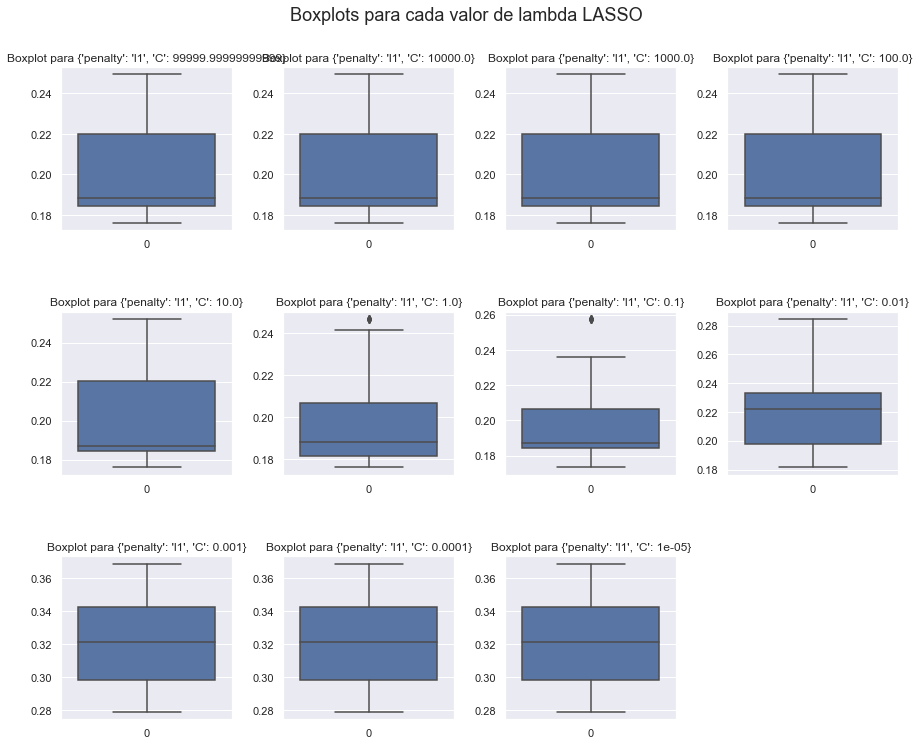

In [113]:
#Hacemos un loop para graficar los box plots para cada valor de lambda - LASSO
import seaborn as sns

configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}, {"penalty":'l1', 'C':1/(10**-3)}, {"penalty":'l1', 'C':1/(10**-2)}, {"penalty":'l1', 'C':1/(10**-1)}, {"penalty":'l1', 'C':1/(10**0)}, {"penalty":'l1', 'C':1/(10**1)}, {"penalty":'l1', 'C':1/(10**2)}, {"penalty":'l1', 'C':1/(10**3)}, {"penalty":'l1', 'C':1/(10**4)}, {"penalty":'l1', 'C':1/(10**5)}]

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
plt.suptitle("Boxplots para cada valor de lambda LASSO", fontsize=18, y=0.95)

for n, configuracion in enumerate(configuraciones):
    ax = plt.subplot(3, 4, n + 1)
    input = cross_validation_alt("logit", 10, X, y, configuracion)
    sns.set()
    ss = sns.boxplot(data=input["ECM"])
    titulo = "Boxplot para " + str(configuracion)
    ax.set_title(titulo)
    
plt.show()  

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\3111193304.py:53: FutureWarning: The fram

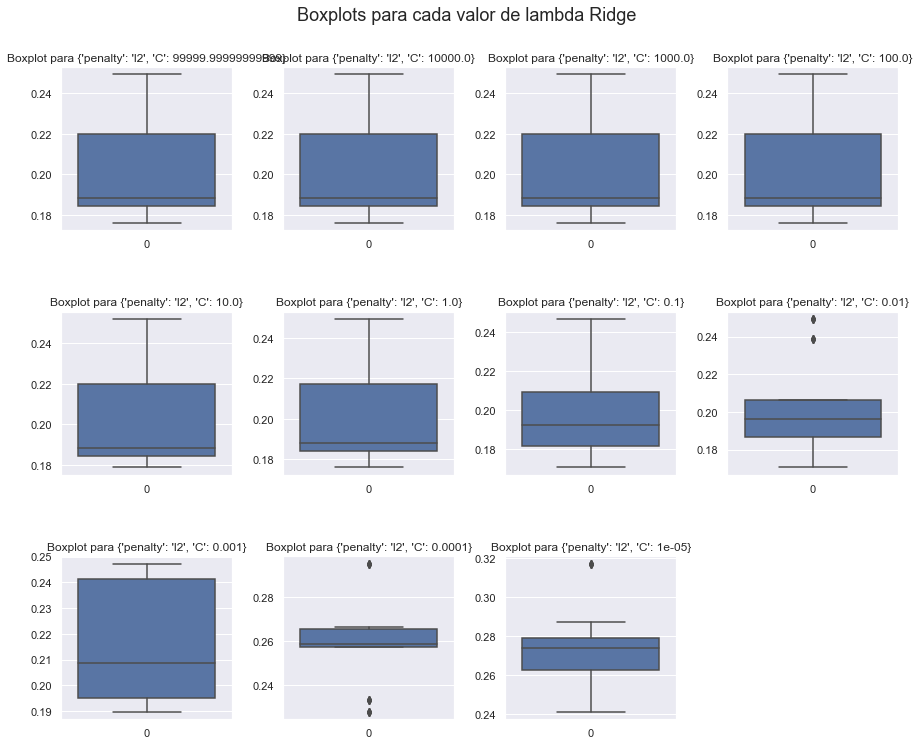

In [157]:
#Hacemos un loop para graficar los box plots para cada valor de lambda - RIDGE
import seaborn as sns

configuraciones = [{"penalty":'l2', 'C':1/(10**-5)}, {"penalty":'l2', 'C':1/(10**-4)}, {"penalty":'l2', 'C':1/(10**-3)}, {"penalty":'l2', 'C':1/(10**-2)}, {"penalty":'l2', 'C':1/(10**-1)}, {"penalty":'l2', 'C':1/(10**0)}, {"penalty":'l2', 'C':1/(10**1)}, {"penalty":'l2', 'C':1/(10**2)}, {"penalty":'l2', 'C':1/(10**3)}, {"penalty":'l2', 'C':1/(10**4)}, {"penalty":'l2', 'C':1/(10**5)}]

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Boxplots para cada valor de lambda Ridge", fontsize=18, y=0.95)
fig.subplots(sharex=True)

for n, configuracion in enumerate(configuraciones):
    ax = plt.subplot(3, 4, n + 1)
    input = cross_validation_alt("logit", 10, X, y, configuracion)
    sns.set()
    ss = sns.boxplot(data=input["ECM"])
    titulo = "Boxplot para " + str(configuracion)
    ax.set_title(titulo)

fig.show()   

##### Boxplot con la proporción de variables ignoradas por el modelo en función de lamda

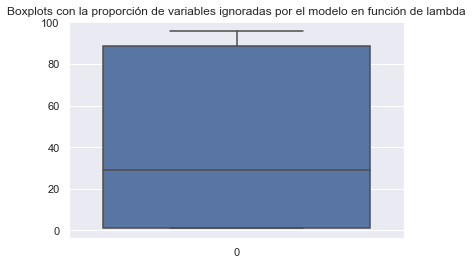

In [210]:
#Hacemos un loop para graficar los box plots con la proporción de variables ignoradas por el modelo en función de lambda - Lasso
import seaborn as sns

configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}, {"penalty":'l1', 'C':1/(10**-3)}, {"penalty":'l1', 'C':1/(10**-2)}, {"penalty":'l1', 'C':1/(10**-1)}, {"penalty":'l1', 'C':1/(10**0)}, {"penalty":'l1', 'C':1/(10**1)}, {"penalty":'l1', 'C':1/(10**2)}, {"penalty":'l1', 'C':1/(10**3)}, {"penalty":'l1', 'C':1/(10**4)}, {"penalty":'l1', 'C':1/(10**5)}]

plt.title("Boxplots con la proporción de variables ignoradas por el modelo en función de lambda")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

input_bxp = []

for n, configuracion in enumerate(configuraciones):    
    log_reg = LogisticRegression(penalty = "l1", C = configuracion["C"], max_iter=10000, solver="liblinear")
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)

    coef = log_reg.coef_
    coef_reshape = coef.reshape((-1, 1))

    coeficientes = pd.DataFrame(coef_reshape, index= X_train.columns)
    coeficientes = coeficientes.reset_index()
    coeficientes = coeficientes.set_axis(['var', 'coefic'], axis=1, inplace=False)
    
    ceros = []
    for i, row in coeficientes.iterrows():
        if coeficientes.loc[i,"coefic"] == 0:
            ceros.append(coeficientes.loc[i, "var"])
    
    input_bxp.append(len(ceros))

sns.set()
ss = sns.boxplot(data=input_bxp)

plt.show()   

In [203]:
#Prueba para obtener los coeficientes del mejor modelo con uno de los lamdas

configuracion = {"penalty":'l1', 'C':1/(10**-5)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

log_reg = LogisticRegression(penalty = "l1", C= 1/(10**-5), max_iter=10000, solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

coef = log_reg.coef_
coef_reshape = coef.reshape((-1, 1))

coeficientes = pd.DataFrame(coef_reshape, index= X_train.columns)
coeficientes = coeficientes.reset_index()
coeficientes = coeficientes.set_axis(['var', 'coefic'], axis=1, inplace=False)

coeficientes

,var,coefic
0,AGLOMERADO_x,0.413215
1,ANO4_x,-0.001584
2,CAT_INAC,0.261016
3,CAT_OCUP,-0.054406
4,CH03,-0.027947
...,...,...
92,VII2_2,0.002057
93,VII2_3,-0.203738
94,VII2_4,0.000000
95,Varon,-2.130524


In [201]:
ceros = []
for i, row in coeficientes.iterrows():
    if coeficientes.loc[i,"coefic"] == 0:
        ceros.append(coeficientes.loc[i, "var"])


['VII2_4']


### 6)

In [123]:
# Chequeamos qué variables fueron descartadas para el valor óptimo de LASSO del inciso anterior (lamda = 1)

configuracion = {"penalty":'l1', 'C':1/(10**0)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

log_reg = LogisticRegression(penalty = "l1", C= 1/(10**0), max_iter=10000, solver="liblinear", fit_intercept=False)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

coef = log_reg.coef_
coef_reshape = coef.reshape((-1, 1))

print("Coeficientes del modelo con lamda óptimo:")
coeficientes_lamda_optimo = pd.DataFrame(coef_reshape, index= X_train.columns)

coeficientes_lamda_optimo

Coeficientes del modelo con lamda óptimo:


,0
AGLOMERADO_x,0.468799
ANO4_x,-0.007932
CAT_INAC,0.247002
CAT_OCUP,-0.017567
CH03,-0.039821
...,...
VII2_2,-0.012490
VII2_3,-0.182876
VII2_4,0.000000
Varon,0.000000


In [63]:
# Exportamos la base para poder ver todos los coeficientes mejor:

coeficientes_lamda_optimo.to_excel("Coeficientes_punto6.xlsx")

En el caso del lamda óptimo hallado en el inciso anterior, las variables que son descartadas son:
- CH16: Dónde vivía hace 5 años
- H15: Entrevista individual realizada (sí/no)
- II3: Utiliza alguna habitación del hogar exclusivamente como lugar de trabajo (consultorio, estudio, taller, negocio, etc.)
- II4_1: Cuarto de cocina (sí/no)
- II6: De los lugares planteados en la pregunta 4 utiliza alguno exclusivamente como lugar de trabajo
- II6_1: No figura en el diccionario
- IV11: Cómo es el desague del baño
- IV12_1: La vivienda está ubicada cerca de un basural
- IV12_3: La vivienda está ubicada en villa de emergencia
- IX_MEN10: Cantidad de miembros del hogar menores de 10 años
- PP02C1: Hizo contactos, entrevistas (búsqueda laboral)
- PP02C3: Se presentó en establecimientos (búsqueda laboral)
- PP02C4: Hizo algo para ponerse por su cuenta (búsqueda laboral)
- PP02C5: Puso carteles en negocios, preguntó en el barrio (búsqueda laboral)
- PP02C8: De otra forma activa (búsqueda laboral)
- PP02H: En los últimos 12 meses, ¿buscó trabajo en algún momento?
- REALIZADA: Entrevista realizada (hogar respondió o no)
- REGION_x
- TRIMESTRE_x
- V15: En los últimos tres meses, las personas del hogar han vivido pedir préstamos a bancos, financieras, etc.
- V18: Tuvieron otros ingresos en efectivo (limosnas, juegos de azar, etc.)
- V19_A: ¿Menores de 10 años ayudan con algún dinero trabajando?
- V19_B: ¿Menores de 10 años ayudan con algún menores pidiendo?
- V3: En los últimos tres meses, las personas del hogar han vivido de indemnización por despido
- V4: En los últimos tres meses, las personas del hogar han vivido de seguro de desempleo
- V9: En los últimos tres meses, las personas del hogar han vivido ganancias de algún negocio en el que no trabajan
- VII2_4: Otras personas que ayudan en las tareas de la casa
- Varon: Variable armada por nosotras para poder adjuntar los valores de la tabla de equivalencias
- cte

En general, podemos observar que todas las variables que habíamos considerado como relevantes para evaluar los niveles de pobreza han sido conservadas por el modelo. Las que se han descartado tienen que ver con detalles más específicos acerca de las viviendas o los individuos, que no habíamos considerado como relevantes. Sin embargo, hay cuatro variables que nos llama la atención que no hayan sumado poder predictivo al modelo y hayan sido descartadas como, por ejemplo, si los menores de edad trabajan o ayudan pidiendo, si el hogar está cerca de un basural o si el hogar está en en un barrio de emergencia.

### 7)

Para responder este punto nos referiremos a todos los modelos de regresión logística que evaluamos en el inciso 5 de esta parte III del trabajo. En particular, aprovecharemos el hecho de que ambos métodos de regularización (Ridge y Lasso) obtuvieron el mismo lamda (lamda=1) como hiperparámetro óptimo. En este sentido, si observamos el ECM producido por cada una de los modelos de predicción, veremos que Lasso es el método de regularización que mejor funcionó: su ECM fue de 0.1980234, mientras que el de Ridge, fue de 0.199516.

### 8)

In [116]:
configuraciones = [{"penalty":'l1', 'C':1},{"penalty":'l2', 'C':1}]
df= evalua_multiples_metodos(configuraciones, 10, X, y)
df

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2125924564.py:50: FutureWarning: The fram

,Modelo,Configuración,Error Cuadratico Medio,Matriz de confusion,Valor AUC,Accuracy score,K usados en vecinos cercanos
0,Regresión Logística,"{'penalty': 'l1', 'C': 1}",0.198057,"[[677, 78], [132, 220]]",0.7608,0.81,
1,Analisis discriminante lineal,"{'penalty': 'l1', 'C': 1}",0.194219,"[[675, 80], [135, 217]]",0.7553,0.81,
2,Vecinos cercanos,"{'penalty': 'l1', 'C': 1}",0.216802,"[[711, 44], [196, 156]]",0.6925,0.78,La cantidad de vecinos cercanos utilizados es 10


Para determinar cuál de todos los métodos es el que predice mejor, recurrimos a la función "evalua_multiples_metodos". Mediante esta, evaluamos diferentes métodos de predicción, tomando como configuración los hiperparámetros que en los incisos anteriores habíamos encontrado como los óptimos para el modelo de regresión logística. 

Así, podemos observar que tanto el modelo de "Regresión Logística" (con Lamda igual a 1 y el método de Lasso) como el de "Análisis Discrimante Lineal" están muy cercanos con los valores de las medidas de precisión. Incluso, se puede señalar que coinciden en el valor del "Accuracy score". Sin embargo, si nos guiáramos estrictamente por la medida del ECM, el modelo que convendría elegir dado que es el que mejor predice es el de Análisis Discriminante Lineal.

### 9)

In [125]:
norespondieron["cte"] = 1

C:\Users\pilih\AppData\Local\Temp\ipykernel_12256\2167727655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron["cte"] = 1


In [222]:
lda = LinearDiscriminantAnalysis()        
lda = lda.fit(X_train, y_train)
        
# Realizamos las predicciones para la muestra de testeo
pobres_pred_lda = lda.predict(norespondieron)

C:\Users\pilih\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [223]:
print("Hogares pobres predichos:", np.sum(pobres_pred_lda))
print("Hogares que no reportaron ingreso:", len(norespondieron))
print("Proporción de hogares pobres:", (np.sum(pobres_pred_lda))/(len(norespondieron))*100, "%")

Hogares pobres predichos: 1542.0
Hogares que no reportaron ingreso: 1542
Proporción de hogares pobres: 100.0 %


Vemos que la proporción de hogares pobres obtenida de nuestra predicción con análisis discriminante lineal es del 100%. Nos resulta extraño por lo que creemos que puede haber algún error previo en la estimación. Por lo tanto chequeamos el modelo con las x de entrenamiento (sabemos que está bien porque el modelo se construyó en base a eso), lo que nos da una proporción de pobres del 42,47% , más similar a la declarada por el INDEC.